<a href="https://colab.research.google.com/github/francusi/CoderDS/blob/main/ProyectoDSParteIBarrionuevo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final DS
## Entrega N° 1
---

## Abstract

Este proyecto se centra en el análisis exploratorio de los datos de usos del sistema de transporte público SUBE en la ciudad de Rosario, provincia de Santa Fe, utilizando datasets provistos por la entidad SUBE que abarcan los años 2022, 2023 y 2024. Cada dataset contiene aproximadamente 450 mil registros con información detallada sobre cada transacción, incluyendo fecha, empresa, línea, tipo de transporte, jurisdicción y cantidad de usos.

El objetivo principal es explorar y comprender los patrones de uso del transporte público en Rosario a través de un análisis descriptivo y temporal. Se buscará identificar tendencias en la cantidad de pasajeros a lo largo del tiempo (diaria y mensualmente), analizar la distribución de usos por línea y empresa, y detectar posibles patrones estacionales o cambios significativos en la demanda.

Este análisis resulta especialmente relevante en el contexto actual, donde la movilidad urbana constituye un eje central para la planificación de políticas públicas, la asignación de recursos y la mejora en la experiencia de los usuarios. Conocer cómo se comporta la demanda del transporte público permite identificar horarios de mayor carga, líneas con mayor participación relativa y posibles desequilibrios entre oferta y demanda.

Para llevar adelante este estudio se aplicarán técnicas de análisis univariado, bivariado y multivariado, apoyadas en resúmenes numéricos y visualizaciones interactivas. Se emplearán librerías de Python como pandas, Matplotlib, Seaborn y Plotly para garantizar un enfoque claro y didáctico en la exploración de los datos.

En esta primera etapa no se busca generar modelos predictivos, sino sentar las bases para un entendimiento sólido del fenómeno. Los resultados obtenidos constituirán un insumo clave para futuros análisis que podrían incluir predicciones de la demanda, segmentación de empresas y evaluación del impacto de políticas de transporte.

---



## Preguntas / Hipótesis de Interés

1.  ¿Cuales son las lineas de colectivo mas demandadas por los usuarios?
¿Cual es la proporcion de mercado que maneja cada empresa segun los viajes realizados?
2.  ¿Existen variaciones en la cantidad de viajes a lo largo de los años?
3.  ¿Cuales dias son aquellos en que los usurios utilizan mas el transporte publico?

## Objetivo del Proyecto

El objetivo principal de este proyecto es realizar un análisis exploratorio y descriptivo de los datos de uso del sistema de transporte público SUBE en la ciudad de Rosario entre 2022 y 2024. Se busca comprender los patrones de comportamiento de los usuarios, identificar tendencias temporales (diarias, mensuales y anuales), analizar la distribución de usos por líneas y empresas, y validar o refutar las preguntas planteadas. Este análisis proporcionará una base sólida para entender la dinámica del transporte público en la región y podrá servir como punto de partida para estudios más avanzados, como la optimización de rutas o la planificación de servicios.


---



In [2]:
# Carga de datasets SUBE desde Google Sheets (2022, 2023, 2024)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Rutas a los archivos
files = {
    # Archivo 2022
    "2022": "https://docs.google.com/spreadsheets/d/1VKmmtgU_DcU0wal4qhcG7BrNGJVGyFfvrd3y5b2FnU4/gviz/tq?tqx=out:csv&gid=0",

    # Archivo 2023
    "2023": "https://docs.google.com/spreadsheets/d/1PYqXvgE0LgPwiOr7UfEJQvTtOzu-poexsRIDS0RiO8Y/gviz/tq?tqx=out:csv&gid=0",

    # Archivo 2024
    "2024": "https://docs.google.com/spreadsheets/d/1n3eALUDlM_P6gXqt1orfRb0ijMCYm7YFpHN00-8AROI/gviz/tq?tqx=out:csv&gid=0",
}

# Leo datasets y guardo en un diccionario
dfs = {}
for year, path in files.items():
    # Usamos pd.read_csv para leer la URL de exportación del Sheets
    dfs[year] = pd.read_csv(path)
    dfs[year]["anio"] = int(year) # agregar columna de año como indice

# Unimos todo en un solo DataFrame
df = pd.concat(dfs.values(), ignore_index=True)
print("Tamaño del dataset:", df.shape)
df.head()

Tamaño del dataset: (1416304, 11)


,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR,anio
0,2022-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,10,NO,2022
1,2022-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,19,NO,2022
2,2022-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1418,NO,2022
3,2022-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,675,NO,2022
4,2022-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1906,NO,2022


In [3]:
# Filtrar por Provincia y Municipio
df_filtrado = df[(df['PROVINCIA'] == 'SANTA FE') & (df['MUNICIPIO'] == 'ROSARIO')].copy()

print("Tamaño del dataset filtrado:", df_filtrado.shape)

df_filtrado.head()

Tamaño del dataset filtrado: (27693, 11)


,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR,anio
487365,2023-02-10,MOVI ROSARIO S.A.U,LINEA_115,NO,COLECTIVO,MUNICIPAL,SANTA FE,ROSARIO,28,NO,2023
489621,2023-02-12,MOVI ROSARIO S.A.U,LINEA_115,NO,COLECTIVO,MUNICIPAL,SANTA FE,ROSARIO,3,NO,2023
490839,2023-02-13,MOVI ROSARIO S.A.U,LINEA_115,NO,COLECTIVO,MUNICIPAL,SANTA FE,ROSARIO,1,NO,2023
509121,2023-02-28,MOVI ROSARIO S.A.U,LINEA_112,NO,COLECTIVO,MUNICIPAL,SANTA FE,ROSARIO,1,NO,2023
509122,2023-02-28,MOVI ROSARIO S.A.U,LINEA_115_AEROPUERTO,NO,COLECTIVO,MUNICIPAL,SANTA FE,ROSARIO,1,NO,2023


En base al analsis anterior, vamos a verificar si existen datos en el año 2022 para la ciudad de Rosario.

In [4]:
# Filtramos por el año y guardamos
df_filtrado_2022 = df_filtrado[(df_filtrado['anio'] == 2022) & (df_filtrado['MUNICIPIO'] == "ROSARIO")]

# Imprimimos un mensaje con el resultado
if df_filtrado_2022.empty:
    print("No existen datos de usos diarios para el año 2022 en el dataset filtrado.")
else:
    print("Existen datos de usos diarios para el año 2022 en el dataset filtrado. Primeras filas:")
    display(df_filtrado_2022.head())

No existen datos de usos diarios para el año 2022 en el dataset filtrado.


## Missing Values

Con este codigo identificamos y mostramos si existen valores faltantes en cada columna del dataframe

In [5]:
missing = df_filtrado.isna().sum().sort_values(ascending=False)
missing[missing > 0]

,0


Observado el resultado podemos ver que no existen valores faltantes en nuestro df.


In [23]:
# Convertimos 'DIA_TRANSPORTE' a datetime
df_filtrado['DIA_TRANSPORTE'] = pd.to_datetime(df_filtrado['DIA_TRANSPORTE'])


Columna 'anio' eliminada.
Columnas actuales: ['DIA_TRANSPORTE', 'NOMBRE_EMPRESA', 'LINEA', 'AMBA', 'TIPO_TRANSPORTE', 'JURISDICCION', 'PROVINCIA', 'MUNICIPIO', 'CANTIDAD', 'DATO_PRELIMINAR', 'ANIO', 'TIPO_DIA', 'MES']


## Identificación y Eliminación de Outliers

Utilizaremos el método del rango intercuartílico (IQR) para identificar y eliminar los outliers en la columna `CANTIDAD`.

Número de outliers identificados: 372

Primeras filas de los outliers:


,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR,ANIO,TIPO_DIA,MES
604148,2023-05-12,ROSARIO BUS S.A,LINEA_142,NO,COLECTIVO,MUNICIPAL,SANTA FE,ROSARIO,15791,NO,2023,Día Laboral,5
610644,2023-05-17,ROSARIO BUS S.A,LINEA_142,NO,COLECTIVO,MUNICIPAL,SANTA FE,ROSARIO,15853,NO,2023,Día Laboral,5
612022,2023-05-18,ROSARIO BUS S.A,LINEA_142,NO,COLECTIVO,MUNICIPAL,SANTA FE,ROSARIO,16128,NO,2023,Día Laboral,5
626024,2023-05-29,ROSARIO BUS S.A,LINEA_142,NO,COLECTIVO,MUNICIPAL,SANTA FE,ROSARIO,16259,NO,2023,Día Laboral,5
627413,2023-05-30,ROSARIO BUS S.A,LINEA_142,NO,COLECTIVO,MUNICIPAL,SANTA FE,ROSARIO,16243,NO,2023,Día Laboral,5


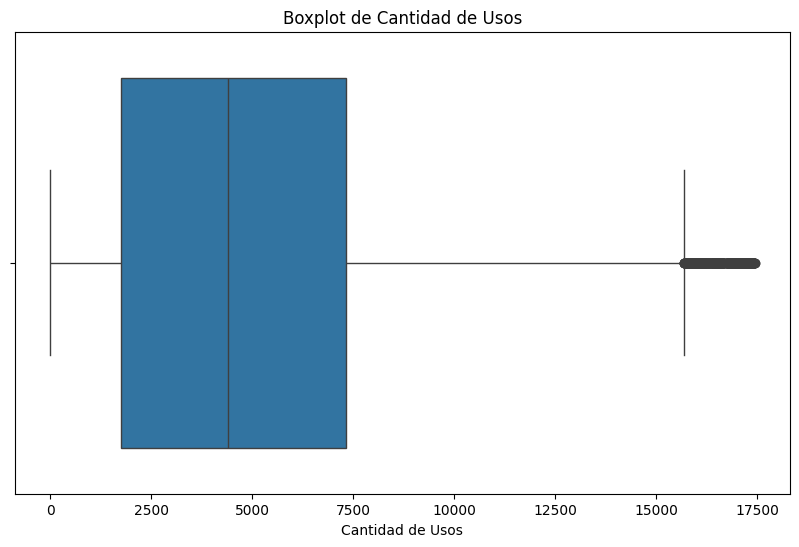


Tamaño del dataset después de eliminar outliers: (25401, 13)


,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR,ANIO,TIPO_DIA,MES
487365,2023-02-10,MOVI ROSARIO S.A.U,LINEA_115,NO,COLECTIVO,MUNICIPAL,SANTA FE,ROSARIO,28,NO,2023,Día Laboral,2
489621,2023-02-12,MOVI ROSARIO S.A.U,LINEA_115,NO,COLECTIVO,MUNICIPAL,SANTA FE,ROSARIO,3,NO,2023,Fin de Semana,2
490839,2023-02-13,MOVI ROSARIO S.A.U,LINEA_115,NO,COLECTIVO,MUNICIPAL,SANTA FE,ROSARIO,1,NO,2023,Día Laboral,2
509121,2023-02-28,MOVI ROSARIO S.A.U,LINEA_112,NO,COLECTIVO,MUNICIPAL,SANTA FE,ROSARIO,1,NO,2023,Día Laboral,2
509122,2023-02-28,MOVI ROSARIO S.A.U,LINEA_115_AEROPUERTO,NO,COLECTIVO,MUNICIPAL,SANTA FE,ROSARIO,1,NO,2023,Día Laboral,2


In [24]:
# Calcular Q1 (primer cuartil) y Q3 (tercer cuartil)
Q1 = df_filtrado['CANTIDAD'].quantile(0.25)
Q3 = df_filtrado['CANTIDAD'].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Definir los límites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers = df_filtrado[(df_filtrado['CANTIDAD'] < limite_inferior) | (df_filtrado['CANTIDAD'] > limite_superior)]

print(f"Número de outliers identificados: {len(outliers)}")
print("\nPrimeras filas de los outliers:")
display(outliers.head())

# Opcional: Visualizar la distribución de CANTIDAD con un boxplot para ver los outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtrado['CANTIDAD'])
plt.title('Boxplot de Cantidad de Usos')
plt.xlabel('Cantidad de Usos')
plt.show()

# Eliminar outliers y actualizar df_filtrado
df_filtrado = df_filtrado[(df_filtrado['CANTIDAD'] >= limite_inferior) & (df_filtrado['CANTIDAD'] <= limite_superior)].copy()

print(f"\nTamaño del dataset después de eliminar outliers: {df_filtrado.shape}")
display(df_filtrado.head())

## Análisis por Línea y Empresa (Univariado)

Identificamos las líneas y empresas de transporte con mayor volumen de usos en Rosario y analizamos su distribución.

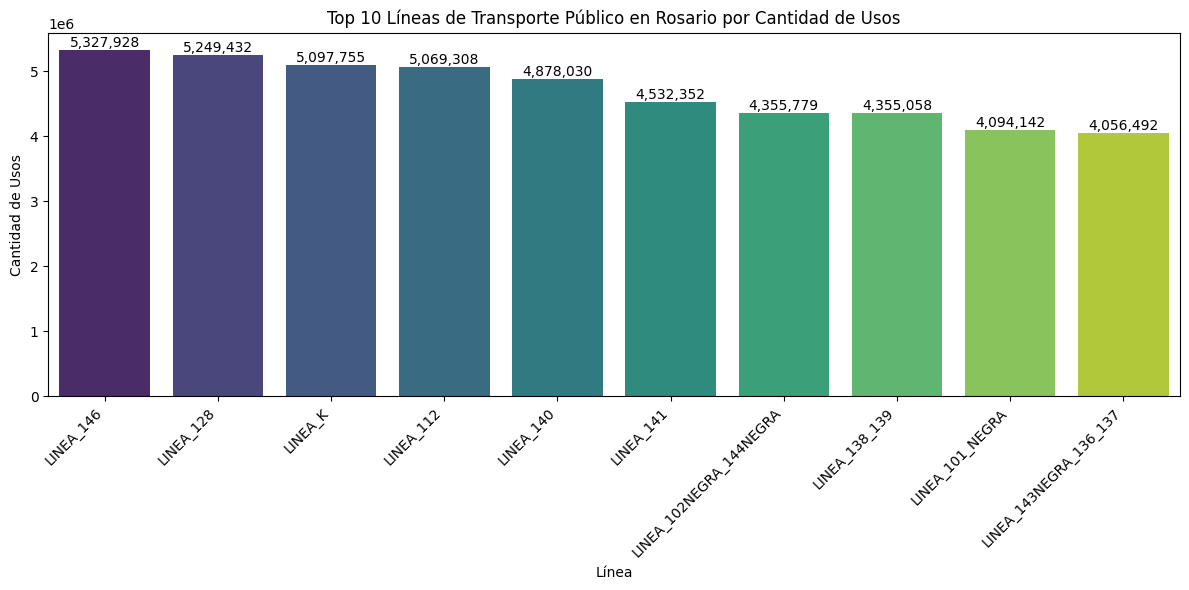

,NOMBRE_EMPRESA,CANTIDAD
0,ROSARIO BUS S.A,63.918.397
1,MOVI ROSARIO S.A.U,59.792.906


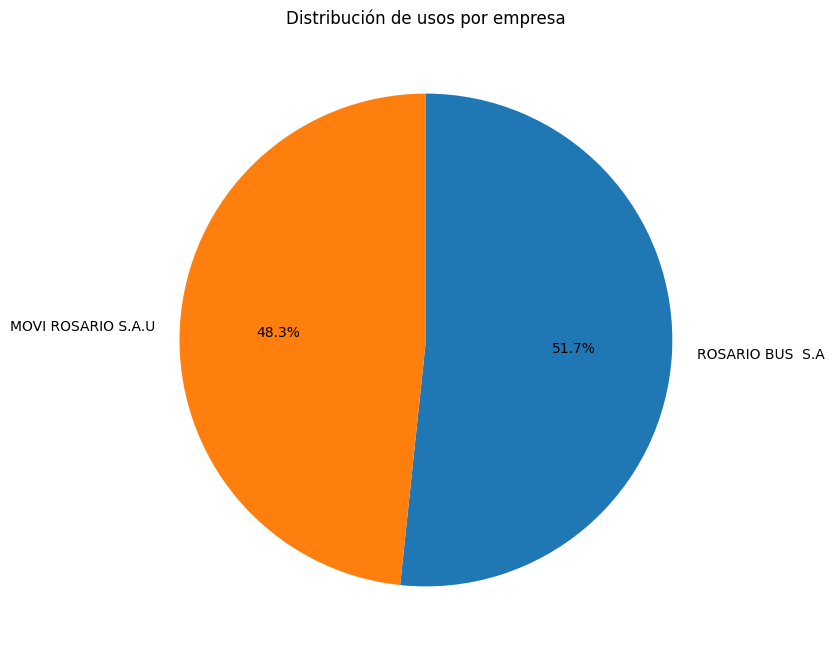

In [25]:
# Agrupamos por linea, sumamos los usos y ordenamos por orden descendente
usos_por_linea = df_filtrado.groupby('LINEA')['CANTIDAD'].sum().sort_values(ascending=False)

# Seleccionamos top 10 lineas mas usadas
top_10_lineas = usos_por_linea.head(10)

# Graficamos top 10 mediante grafico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_10_lineas.index, y=top_10_lineas.values, hue=top_10_lineas.index, palette='viridis', legend=False)
plt.title('Top 10 Líneas de Transporte Público en Rosario por Cantidad de Usos')
plt.xlabel('Línea')
plt.ylabel('Cantidad de Usos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Añadimos valores a las barras y configuramos separador de miles
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}')
plt.show()

# Agrupamos por empresa y sumamos usos
usos_por_empresa = df_filtrado.groupby('NOMBRE_EMPRESA')['CANTIDAD'].sum().sort_values(ascending=False)
usos_empresa_fmt = usos_por_empresa.reset_index()
usos_empresa_fmt["CANTIDAD"] = usos_empresa_fmt["CANTIDAD"].map("{:,.0f}".format).str.replace(",", ".")
display(usos_empresa_fmt)



# Gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(
    usos_por_empresa,
    labels=usos_por_empresa.index,
    autopct='%1.1f%%',   # muestra porcentajes con un decimal
    startangle=90,       # arranca el gráfico desde arriba
    counterclock=False   # para que vaya en sentido horario
)

plt.title("Distribución de usos por empresa")
plt.show()


## Evolución Anual 2023 - 2024 (Bivariado)


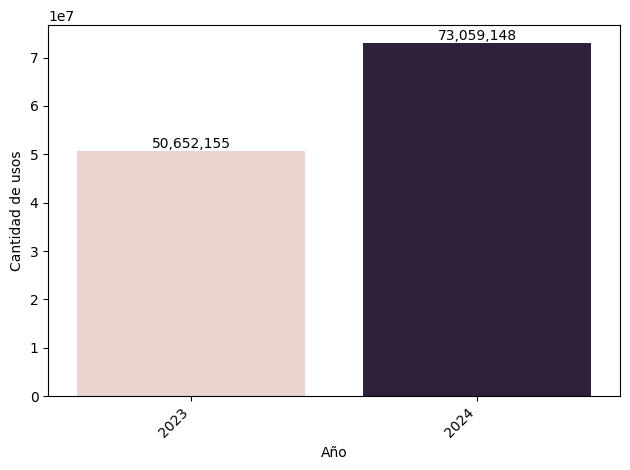

--- Análisis de Crecimiento Anual ---
El crecimiento de usos del 2023 al 2024 fue de: 44.24%


In [26]:
# Suponiendo que 'df_filtrado' y 'usos_anio' ya están definidos como en tu código original
df_filtrado['ANIO'] = df_filtrado['DIA_TRANSPORTE'].dt.year
usos_anio = df_filtrado.groupby('ANIO')['CANTIDAD'].sum()

# Crea el gráfico de barras
ax = sns.barplot(x=usos_anio.index, y=usos_anio.values, hue=usos_anio.index, legend=False)
plt.xlabel('Año')
plt.ylabel('Cantidad de usos')
plt.xticks(rotation=45, ha='right')

# Agrega las etiquetas de texto en cada barra
for index, value in enumerate(usos_anio):
    ax.text(index, value, f'{int(value):,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


# .pct_change() calcula el cambio fraccional, lo multiplicamos por 100
crecimiento = usos_anio.pct_change() * 100

# 3. Seleccionar el valor de crecimiento para 2024
crecimiento_2024 = crecimiento.loc[2024]

# 4. Imprimir el mensaje informativo en la consola
print("--- Análisis de Crecimiento Anual ---")
print(f"El crecimiento de usos del 2023 al 2024 fue de: {crecimiento_2024:.2f}%")

## Analisis Multivariado


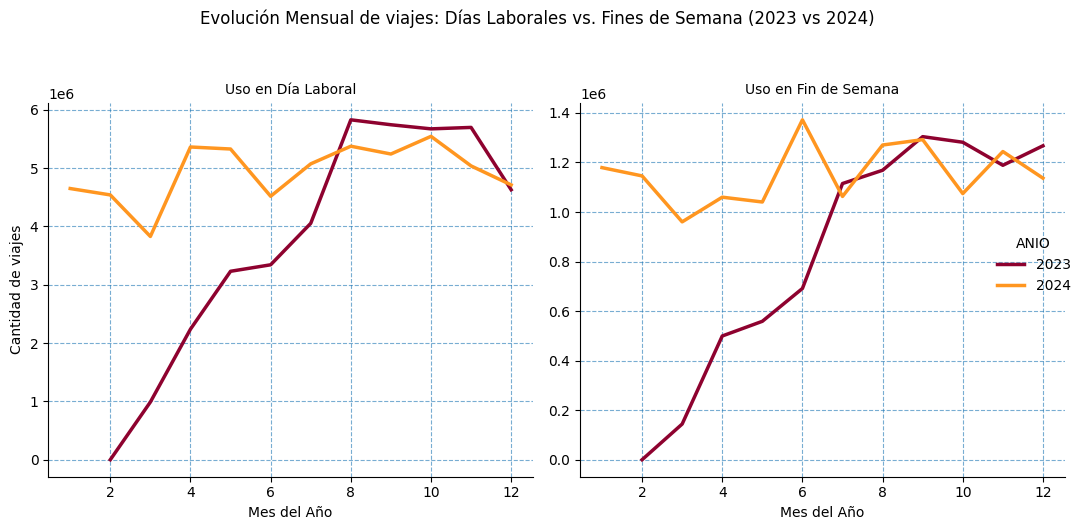

In [27]:
# Segmentamos los dias por dia laboral o fin de semana
df_filtrado['TIPO_DIA'] = df_filtrado['DIA_TRANSPORTE'].dt.weekday.apply(lambda x: 'Día Laboral' if x < 5 else 'Fin de Semana')

# Extraemos mes de la columna 'DIA_TRANSPORTE'
df_filtrado['MES'] = df_filtrado['DIA_TRANSPORTE'].dt.month

# Agrupamos por año, mes, dia y sumamos la cantidad de viajes
usos_mensuales_tipodia = df_filtrado.groupby(['ANIO', 'MES', 'TIPO_DIA'])['CANTIDAD'].sum().reset_index()

# Usamos relplot que es ideal para crear subplots
g = sns.relplot(
    data=usos_mensuales_tipodia,
    x='MES',
    y='CANTIDAD',
    hue='ANIO',          # El color diferenciará el año
    col='TIPO_DIA',      # ESTA LÍNEA CREA LOS DOS GRÁFICOS SEPARADOS
    kind='line',         # Le decimos que queremos un gráfico de líneas
    lw=2.5,              # Hacemos las líneas un poco más gruesas
    palette=['#8E022F', '#FF9620'], # Paleta de colores (gris para el pasado, azul para el presente)
    facet_kws={'sharey': False} # MUY IMPORTANTE: Permite que cada gráfico tenga su propia escala Y
)

# Mejoramos los títulos y etiquetas para mayor claridad
g.fig.suptitle('Evolución Mensual de viajes: Días Laborales vs. Fines de Semana (2023 vs 2024)', y=1.05)
g.set_axis_labels("Mes del Año", "Cantidad de viajes")
g.set_titles("Uso en {col_name}") # Títulos dinámicos para cada subplot
g.map(plt.grid, linestyle='--', alpha=0.6) # Añade una grilla a cada gráfico

# Ajustamos para que se vea bien
plt.tight_layout()
plt.show()

## Conclusiones:
1. En base a los analisis trabajados anteriormente, podemos identificar las 10 lineas de colectivo mas utilizadas por los rosarinos, claramente vemos que durante el año 2023 y 2024, la linea 142 fue la que mas viajes registró. Tambien la empresa 'Rosario BUS S.A' fue la que mas viajes registro con un 51,7 % del total de los viajes.

2. El análisis comparando el uso anual para 2023 y 2024 muestra claramente un aumento significativo en la cantidad de usos en 2024 en comparación con 2023 (un crecimiento de más del 50%). Esto indica una variación sustancial en el número de viajes año tras año, al menos entre estos dos años del conjunto de datos proporcionado.

3. El análisis multivariado comparando el uso mensual en "Día Laboral" vs. "Fin de Semana" nos proporciona la información que necesitamos. El gráfico de líneas muestra que la cantidad total de usos es significativamente mayor en los días laborables en comparación con los fines de semana en casi todos los meses tanto en 2023 como en 2024. Esto sugiere que los días laborables son los días con mayor uso del transporte público.


# **Consignas Proyecto Final**


## Selección de features (feature selection)

### Subtask:
Analizaré diferentes métodos de selección de features para reducir la dimensionalidad del dataset `df_filtrado_sin_outliers`. Consideraré métodos basados en correlación, métodos univariados o métodos basados en modelos. Incluiré el día de la semana como una característica potencial. Elegiré uno o dos métodos apropiados y aplicaré para obtener un subconjunto de características relevantes.



In [38]:
# Crea la columna 'DIA_SEMANA'
df_filtrado['DIA_SEMANA'] = df_filtrado['DIA_TRANSPORTE'].dt.day_name()


# Selecciona columnas numéricas para el análisis de correlación
df_numerical_updated = df_filtrado.select_dtypes(include=np.number)


# Calcula la matriz de correlación actualizada
correlation_matrix_updated = df_numerical_updated.corr()

# Identifica las correlaciones actualizadas con 'CANTIDAD'
correlation_with_cantidad_updated = correlation_matrix_updated['CANTIDAD'].sort_values(ascending=False)
print("\nActualizacion Correlación con la columna 'CANTIDAD':")
print(correlation_with_cantidad_updated)

# Características numéricas con correlación absoluta > 0.1 (excluyendo la variable objetivo)
selected_numerical_features_final = correlation_with_cantidad_updated[abs(correlation_with_cantidad_updated) > 0.1].index.tolist()
if 'CANTIDAD' in selected_numerical_features_final:
    selected_numerical_features_final.remove('CANTIDAD')

# Características categóricas basadas en la relevancia, incluyendo la nueva 'DIA_SEMANA'
selected_categorical_features_final = ['NOMBRE_EMPRESA', 'LINEA', 'TIPO_TRANSPORTE', 'TIPO_DIA', 'DIA_SEMANA']

print(f"\nCaracterísticas numéricas seleccionadas finalmente: {selected_numerical_features_final}")
print(f"Características categóricas seleccionadas finalmente: {selected_categorical_features_final}")

display(df_filtrado.head())


Actualizacion Correlación con la columna 'CANTIDAD':
CANTIDAD    1.000000
MES         0.177443
ANIO        0.145943
Name: CANTIDAD, dtype: float64

Características numéricas seleccionadas finalmente: ['MES', 'ANIO']
Características categóricas seleccionadas finalmente: ['NOMBRE_EMPRESA', 'LINEA', 'TIPO_TRANSPORTE', 'TIPO_DIA', 'DIA_SEMANA']


,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR,ANIO,TIPO_DIA,MES,DIA_SEMANA
487365,2023-02-10,MOVI ROSARIO S.A.U,LINEA_115,NO,COLECTIVO,MUNICIPAL,SANTA FE,ROSARIO,28,NO,2023,Día Laboral,2,Friday
489621,2023-02-12,MOVI ROSARIO S.A.U,LINEA_115,NO,COLECTIVO,MUNICIPAL,SANTA FE,ROSARIO,3,NO,2023,Fin de Semana,2,Sunday
490839,2023-02-13,MOVI ROSARIO S.A.U,LINEA_115,NO,COLECTIVO,MUNICIPAL,SANTA FE,ROSARIO,1,NO,2023,Día Laboral,2,Monday
509121,2023-02-28,MOVI ROSARIO S.A.U,LINEA_112,NO,COLECTIVO,MUNICIPAL,SANTA FE,ROSARIO,1,NO,2023,Día Laboral,2,Tuesday
509122,2023-02-28,MOVI ROSARIO S.A.U,LINEA_115_AEROPUERTO,NO,COLECTIVO,MUNICIPAL,SANTA FE,ROSARIO,1,NO,2023,Día Laboral,2,Tuesday


## Preparación de los Datos para el Modelado

Dividiremos el dataset `df_filtrado_sin_outliers` en conjuntos de entrenamiento y prueba. Luego, aplicaremos el preprocesamiento necesario, que incluye:

1.  **Codificación de variables categóricas:** Convertiremos las variables categóricas seleccionadas en un formato numérico que los algoritmos de machine learning puedan entender. Utilizaremos One-Hot Encoding.
2.  **Escalado de variables numéricas:** Aseguraremos que las características numéricas tengan escalas similares para evitar que una característica domine a otras en el proceso de entrenamiento del modelo. Utilizaremos StandardScaler.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Definir las características (X) y la variable objetivo (y)
# Usamos las listas de características seleccionadas en el paso anterior
X = df_filtrado[selected_numerical_features_final + selected_categorical_features_final]
y = df_filtrado['CANTIDAD']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamaño del conjunto de entrenamiento (X_train, y_train):", X_train.shape, y_train.shape)
print("Tamaño del conjunto de prueba (X_test, y_test):", X_test.shape, y_test.shape)

# Identificar columnas numéricas y categóricas para el preprocesamiento
numerical_features = selected_numerical_features_final
categorical_features = selected_categorical_features_final

# Crear transformadores para preprocesar las columnas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features) # handle_unknown='ignore' para manejar categorías desconocidas en el test set
    ],
    remainder='passthrough' # Mantener otras columnas que no estén en numerical_features o categorical_features (aunque en este caso no debería haber ninguna)
)

# Crear un pipeline que primero preprocese y luego (opcionalmente, en este paso solo preprocesamos) aplique un modelo
# Por ahora, solo aplicaremos el preprocesador para ver el resultado
pipeline_preprocess = Pipeline(steps=[('preprocessor', preprocessor)])

# Aplicar el preprocesamiento a los conjuntos de entrenamiento y prueba
X_train_processed = pipeline_preprocess.fit_transform(X_train)
X_test_processed = pipeline_preprocess.transform(X_test)

print("\nForma de los datos de entrenamiento después del preprocesamiento:", X_train_processed.shape)
print("Forma de los datos de prueba después del preprocesamiento:", X_test_processed.shape)

# Puedes mostrar las primeras filas de los datos preprocesados (serán arrays numpy)
print("\nPrimeras filas de X_train_processed:")
print(X_train_processed[:5])

Tamaño del conjunto de entrenamiento (X_train, y_train): (20320, 7) (20320,)
Tamaño del conjunto de prueba (X_test, y_test): (5081, 7) (5081,)

Forma de los datos de entrenamiento después del preprocesamiento: (20320, 58)
Forma de los datos de prueba después del preprocesamiento: (5081, 58)

Primeras filas de X_train_processed:
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 35 stored elements and shape (5, 58)>
  Coords	Values
  (0, 0)	1.5636828011814652
  (0, 1)	0.9298184258284706
  (0, 2)	1.0
  (0, 33)	1.0
  (0, 48)	1.0
  (0, 49)	1.0
  (0, 57)	1.0
  (1, 0)	0.9447884786258093
  (1, 1)	0.9298184258284706
  (1, 3)	1.0
  (1, 4)	1.0
  (1, 48)	1.0
  (1, 50)	1.0
  (1, 54)	1.0
  (2, 0)	-0.2930001664855023
  (2, 1)	-1.0754787948077076
  (2, 3)	1.0
  (2, 4)	1.0
  (2, 48)	1.0
  (2, 49)	1.0
  (2, 56)	1.0
  (3, 0)	-1.221341650318986
  (3, 1)	-1.0754787948077076
  (3, 2)	1.0
  (3, 17)	1.0
  (3, 48)	1.0
  (3, 50)	1.0
  (3, 53)	1.0
  (4, 0)	-1.8402359728746418
  (4, 1)	0.9298184258284

## Entrenamiento del Modelo de Regresión (Random Forest)

Entrenaremos un modelo de Random Forest Regressor con los datos de entrenamiento preprocesados.

In [35]:
from sklearn.ensemble import RandomForestRegressor

# Inicializar y entrenar el modelo Random Forest Regressor
# Usamos un random_state para reproducibilidad
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Entrenar el modelo con los datos de entrenamiento preprocesados
rf_model.fit(X_train_processed, y_train)

print("Modelo Random Forest Regressor entrenado exitosamente.")

# Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test_processed)

print("\nPredicciones realizadas en el conjunto de prueba.")
# mostramos las primeras predicciones y los valores reales correspondientes
print("\nPrimeras 5 predicciones vs. valores reales:")
for i in range(5):
    print(f"Predicción: {y_pred[i]:.2f}, Real: {y_test.iloc[i]:.2f}")

Modelo Random Forest Regressor entrenado exitosamente.

Predicciones realizadas en el conjunto de prueba.

Primeras 5 predicciones vs. valores reales:
Predicción: 8786.51, Real: 8274.00
Predicción: 54.44, Real: 111.00
Predicción: 7424.72, Real: 7955.00
Predicción: 84.52, Real: 97.00
Predicción: 1998.00, Real: 1761.00


## Evaluación del Modelo

Calcularemos métricas de evaluación para el modelo de Random Forest Regressor.

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calcular Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calcular Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calcular R-squared (R²)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 907.75
Mean Squared Error (MSE): 2706705.23
Root Mean Squared Error (RMSE): 1645.21
R-squared (R²): 0.80


## Conclusiones (Basadas en las Consignas del Trabajo Final)

A partir de la segunda etapa del proyecto, enfocada en las consignas específicas del trabajo final (selección de features, modelado y evaluación), se obtuvieron los siguientes resultados y conclusiones:

1.  **Selección de Características:** Se realizó un análisis de correlación y se seleccionaron características tanto numéricas (`MES`, `ANIO`) como categóricas (`NOMBRE_EMPRESA`, `LINEA`, `TIPO_TRANSPORTE`, `TIPO_DIA`, `DIA_SEMANA`) que mostraron relevancia para predecir la cantidad de usos diarios del transporte público. La inclusión del día de la semana resultó ser una adición valiosa para capturar patrones de uso diferenciados.

2.  **Preparación de Datos:** El dataset fue dividido en conjuntos de entrenamiento y prueba. Se aplicaron técnicas de preprocesamiento estándar: escalado de características numéricas (`StandardScaler`) y codificación One-Hot de variables categóricas. Este paso fue fundamental para preparar los datos en un formato adecuado para el algoritmo de machine learning.

3.  **Modelado de Regresión (Random Forest):** Se eligió e implementó un modelo Random Forest Regressor, un algoritmo robusto y capaz de capturar relaciones no lineales en los datos. El modelo fue entrenado con el conjunto de datos preprocesado.

4.  **Evaluación del Modelo:** La evaluación del modelo en el conjunto de prueba arrojó métricas clave:
    *   **R²:** 0.80, lo que indica que el modelo explica un 80% de la variabilidad en la cantidad de usos, sugiriendo una buena capacidad predictiva.
    *   **MAE:** 907.75, representando el error absoluto promedio en las predicciones.
    *   **MSE:** 2706705.23
    *   **RMSE:** 1645.21, la raíz cuadrada del error cuadrático medio, que da una idea del error típico en las mismas unidades que la variable objetivo.

**Conclusión General de la Etapa:** El proceso de selección de características identificó variables significativas para el problema. La preparación de datos fue exitosa. El modelo Random Forest entrenado demostró ser un predictor razonablemente bueno de la cantidad de usos diarios, con un R² del 80%. Si bien hay margen para mejora (por ejemplo, optimización de hiperparámetros, exploración de otros modelos o ingeniería de características más avanzada), los resultados obtenidos en esta etapa cumplen con los objetivos de predecir la demanda de usos basándose en las características disponibles y proporcionan una base sólida.